# Modflow2NetCDF



Example converting Modflow output files to NetCDF, then reading and visualizing data from the NetCDF file created.  The resulting files maybe placed on a THREDDS server where they become available via services such as OPeNDAP and WCS. This is demonstrated by accessing data from Modflow NetCDF files from a remote THREDDS server. 

In [1]:
# Freyberg config file - a nice small test case
import os
freyberg_config = os.path.join('resources','freyberg','freyberg.geo')

with open(freyberg_config) as f:
    print f.read()

[general]
precision: single

[space]
crs:      4269
origin_x: -105.243933
origin_y: 40.47377
rotation: 0
units:    ft

[time]
units:    days
base:     1970-01-01

[output]
head:     freyberg.hds
cbud:     freyberg.cbb



In [2]:
# Freyberg NAM file

freyberg_nam = os.path.join('resources','freyberg','freyberg.nam')
with open(freyberg_nam) as f:
    print f.read()

LIST 7 freyberg.lst
BAS6  1 freyberg.bas
DIS  29 freyberg.dis
LPF 11 freyberg.lpf
WEL 12 freyberg.wel
RIV 14 freyberg.riv
RCH 18 freyberg.rch
OC  22 freyberg.oc
PCG 19 freyberg.pcg
DATA(BINARY) 50 freyberg.cbb
DATA(BINARY) 30 freyberg.hds
DATA(BINARY) 31 freyberg.ddn



In [3]:
#define the workspace
freyberg_ws = os.path.join('resources','freyberg')

In [4]:
# Load MODFLOW output files
from modflow2netcdf.output import ModflowOutput
mf = ModflowOutput('freyberg.nam', config_file=freyberg_config, exe_name="mf2005", model_ws=freyberg_ws, verbose=True)


Creating new model with name: freyberg
--------------------------------------------------

Parsing the namefile --> resources\freyberg\freyberg.nam
Setting filehandles:

--------------------------------------------------
External unit dictionary:
{1: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E5F8>, 7: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E5C0>, 11: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E668>, 12: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E6A0>, 50: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E7B8>, 14: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E6D8>, 18: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E710>, 19: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E780>, 22: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E748>, 29: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E630>, 30: <flopy.utils.mfreadnam.NamData object at 0x000000000A85E7F0>, 31: <flopy.utils.mfreadnam.

In [5]:
# Save NetCDF output
freyberg_output = 'temp_freyberg_output.nc'
_ = mf.to_netcdf(output_file=freyberg_output)

WindowsError: [Error 32] The process cannot access the file because it is being used by another process: 'temp_freyberg_output.nc'

In [8]:
# Let's check out the NetCDF file we created
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d.axes3d import Axes3D

In [9]:
# Load NetCDF output
import netCDF4
nc = netCDF4.Dataset(freyberg_output)

In [10]:
nc

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    date_created: 2015-09-04T11:39:00Z
    geospatial_vertical_positive: up
    geospatial_vertical_min: -27.3325004578
    geospatial_vertical_max: -17.3986301422
    geospatial_vertical_resolution: variable
    featureType: Grid
    origin_x: -105.243933
    origin_y: 40.47377
    origin_crs: 4269
    grid_rotation_from_origin: 0.0
    dimensions(sizes): x(40), y(20), layer(1), time(1)
    variables(dimensions): int32 crs(), float64 latitude(x,y), float64 longitude(x,y), float64 elevation(layer,x,y), float32 layer(layer), float32 delc(x), float32 delr(y), |S1 VerticalTransform(), float64 time(time), float32 head(time,layer,x,y), float32 constant_head(time,layer,x,y), float32 flow_right_face(time,layer,x,y), float32 flow_right_face_centered(time,layer,x,y), float32 flow_front_face(time,layer,x,y), float32 flow_front_face_centered(time,layer,x,y), float32 wells(time,layer,x,y), 

In [11]:
ncv = nc.variables

In [13]:
ncv.keys()

[u'crs',
 u'latitude',
 u'longitude',
 u'elevation',
 u'layer',
 u'delc',
 u'delr',
 u'VerticalTransform',
 u'time',
 u'head',
 u'constant_head',
 u'flow_right_face',
 u'flow_right_face_centered',
 u'flow_front_face',
 u'flow_front_face_centered',
 u'wells',
 u'river_leakage',
 u'recharge']

In [23]:
ncv['recharge'].coordinates

u'time layer latitude longitude'

In [14]:
# List variables
for variable_name in ncv:
    print ncv[variable_name].name

crs
latitude
longitude
elevation
layer
delc
delr
VerticalTransform
time
head
constant_head
flow_right_face
flow_right_face_centered
flow_front_face
flow_front_face_centered
wells
river_leakage
recharge


In [19]:
# Get lon/lat variables
x = ncv['longitude'][:,:]
y = ncv['latitude'][:,:]

In [20]:
x.shape

(40L, 20L)

In [28]:
# get the elevation at level 0
z = ncv['elevation'][0, :, :]

In [29]:
z.shape

(40L, 20L)

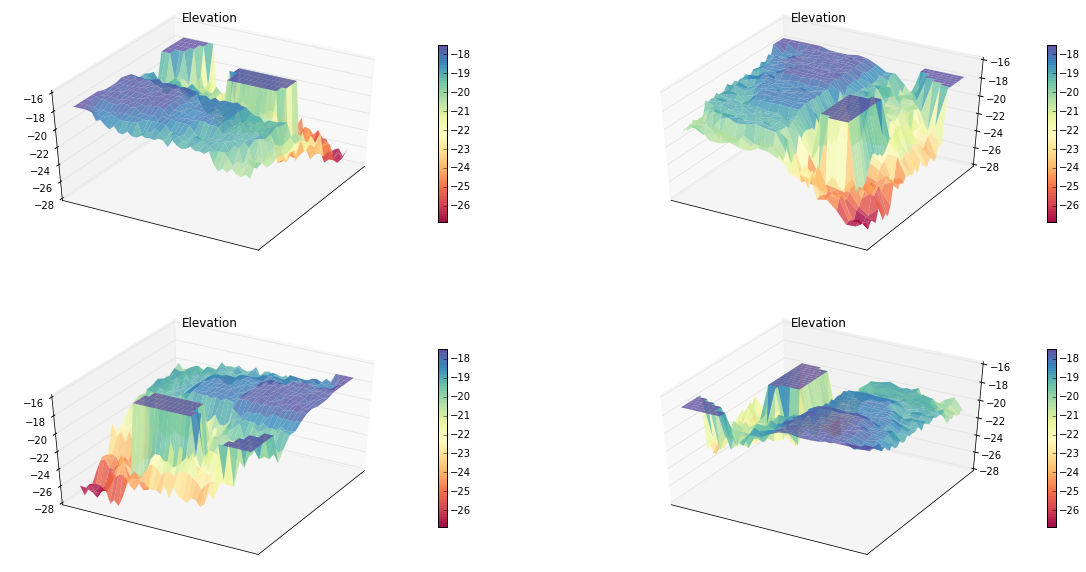

In [30]:

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(2, 2, 1, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 30)

ax = fig.add_subplot(2, 2, 2, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 120)

ax = fig.add_subplot(2, 2, 3, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 210)

ax = fig.add_subplot(2, 2, 4, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 300)

In [ ]:
# Helper plot methods
#mf.to_plot(variable='heads', level=0, time=0)

In [ ]:
#mf.to_plot(variable='flow_right_face_centered', level=0, time=0, colormap=cm.GnBu)

## Accessing data via OPeNDAP

Sample Modflow netcdf files on THREDDS:
    http://thredds45.pvd.axiomalaska.com/thredds/catalog/grabbag/modflow2netcdf/catalog.html

In [32]:
url='http://thredds45.pvd.axiomalaska.com/thredds/dodsC/grabbag/modflow2netcdf/miami-dade.nc'

In [34]:
nc2 = netCDF4.Dataset(url)

In [39]:
nc2v=nc2.variables
lon=nc2v['longitude'][0:10][0]
lon

array([-80.10056037, -80.10555615, -80.11055193, -80.11554771,
       -80.12054349, -80.12553927, -80.13053506, -80.13553084,
       -80.14052663, -80.14552242, -80.1505182 , -80.15551399,
       -80.16050979, -80.16550558, -80.17050137, -80.17549717,
       -80.18049297, -80.18548876, -80.19048456, -80.19548036,
       -80.20047617, -80.20547197, -80.21046777, -80.21546358,
       -80.22045938, -80.22545519, -80.230451  , -80.23544681,
       -80.24044262, -80.24543843, -80.25043425, -80.25543006,
       -80.26042587, -80.26542169, -80.27041751, -80.27541333,
       -80.28040914, -80.28540496, -80.29040078, -80.29539661,
       -80.30039243, -80.30538825, -80.31038408, -80.3153799 ,
       -80.32037573, -80.32537155, -80.33036738, -80.33536321,
       -80.34035904, -80.34535487, -80.3503507 , -80.35534653,
       -80.36034236, -80.3653382 , -80.37033403, -80.37532987,
       -80.3803257 , -80.38532154, -80.39031737, -80.39531321,
       -80.40030905, -80.40530488, -80.41030072, -80.41

In [31]:
from IPython.core.display import HTML
HTML('<iframe src=http://thredds45.pvd.axiomalaska.com/thredds/catalog/grabbag/modflow2netcdf/catalog.html width=800 height=400></iframe>')

In [ ]:
import netCDF4
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
#matplotlib nbagg
# Access existing model output over OPeNDAP
dap = netCDF4.Dataset("http://thredds45.pvd.axiomalaska.com/thredds/dodsC/grabbag/modflow2netcdf/colorado.nc")
#dap = netCDF4.Dataset("http://thredds45.pvd.axiomalaska.com/thredds/dodsC/grabbag/modflow2netcdf/miami-dade.nc")
# List variables
for varname in dap.variables:
    print varname

In [ ]:
# Variable to plot
varname = 'heads'

In [ ]:
# Time index to plot
time = 0

In [ ]:
# Level index to plot
level = 2

In [ ]:
# Colormap to use
colormap = cm.Reds

In [ ]:
# Access data over DAP (syntax1)
x = dap.variables.get("longitude")[:]
y = dap.variables.get("latitude")[:]
z = dap.variables.get("elevation")[level, :]
data = dap.variables.get(varname)[time, level, :, :]

In [ ]:
# Access data over DAP (syntax2)
dapv = dap.variables
x = dapv['longitude'][:]
y = dapv['latitude'][:]
z = dapv['elevation'][level, :]
data = dapv[varname][time, level, :, :]

In [ ]:
plt.pcolormesh(x,y,data);

In [ ]:
# Plot the HEADS
fig = plt.figure(figsize=(20, 10))
m = cm.ScalarMappable(cmap=colormap)
m.set_array(data)
colors = m.to_rgba(data)[:, :, 0]

ax = fig.add_subplot(2, 2, 1, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.80, facecolors=colormap(colors))
fig.colorbar(m, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Time: {0} Level: {1} Variable: {2}'.format(level, time, varname))
ax.view_init(60, 30)

ax = fig.add_subplot(2, 2, 2, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.80, facecolors=colormap(colors))
fig.colorbar(m, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Time: {0} Level: {1} Variable: {2}'.format(level, time, varname))
ax.view_init(60, 120)

ax = fig.add_subplot(2, 2, 3, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.80, facecolors=colormap(colors))
fig.colorbar(m, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Time: {0} Level: {1} Variable: {2}'.format(level, time, varname))
ax.view_init(60, 210)

ax = fig.add_subplot(2, 2, 4, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.80, facecolors=colormap(colors))
fig.colorbar(m, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Time: {0} Level: {1} Variable: {2}'.format(level, time, varname))
ax.view_init(60, 300)